In [35]:
import imgaug as ia
import imgaug.augmenters as iaa
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
import cv2
import matplotlib.pyplot as plt
%matplotlib_inline

UsageError: Line magic function `%matplotlib_inline` not found.


In [47]:
ia.seed(10)
image = ia.quokka(size=(256, 256))

In [13]:
bbs = BoundingBoxesOnImage([
    BoundingBox(x1=50, y1=30, x2=120, y2=150),
    BoundingBox(x1=50, y1=160, x2=120, y2=190)
    ], shape=image.shape)

In [14]:
seq = iaa.Sequential([
    iaa.Multiply((1.2, 1.5)),
    iaa.Affine(
        translate_px={'x':40, 'y':60},
        scale=(0.5, 0.7)
    )
])

In [41]:
image_aug, bbs_aug = seq(image=image, bounding_boxes=bbs)

In [42]:
for i in range(len(bbs.bounding_boxes)):
    before = bbs.bounding_boxes[i]
    after = bbs_aug.bounding_boxes[i]
    print("BB %d: (%.4f, %.4f, %.4f, %.4f) -> (%.4f, %.4f, %.4f, %.4f)" % (
        i,
        before.x1, before.y1, before.x2, before.y2,
        round(after.x1, 0), after.y1, after.x2, after.y2)
    )

BB 0: (50.0000, 30.0000, 120.0000, 150.0000) -> (126.0000, 135.2771, 163.6961, 199.8358)
BB 1: (50.0000, 160.0000, 120.0000, 190.0000) -> (126.0000, 205.2156, 163.6961, 221.3553)


In [43]:
def float_coordinates_to_int(bbox, image_shape):
    x1 = int(round(bbox.x1, 0))
    y1 = int(round(bbox.y1, 0))
    x2 = int(round(bbox.x2, 0))
    y2 = int(round(bbox.y2, 0))
    bbox = BoundingBox(x1, y1, x2, y2)
    return bbox

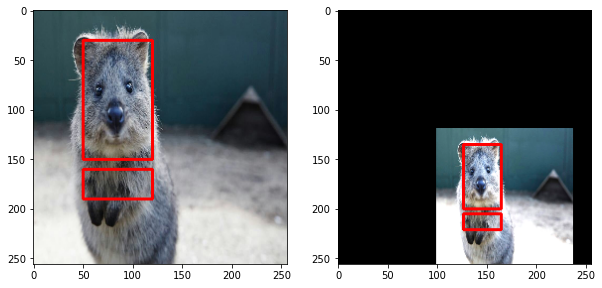

In [44]:
for i in range(len(bbs.bounding_boxes)):
    before = bbs.bounding_boxes[i]
    before = float_coordinates_to_int(before, image.shape)
    image_before = cv2.rectangle(image, (before.x1, before.y1), (before.x2, before.y2), (255,0,0), 2)

    after = bbs_aug.bounding_boxes[i]
    after = float_coordinates_to_int(after, image.shape)
    image_after = cv2.rectangle(image_aug, (after.x1, after.y1), (after.x2, after.y2), (255,0,0), 2)

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(image_before)

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(image_after)
    


In [1]:
import random
import string

In [11]:
letters = string.ascii_letters
random_suffix = ''.join((random.choice(letters) for _ in range(5))) + str(random.randint(10000, 29999))
print(random_suffix)

zTxko24398
